Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'LINK'
against_currency = 'USD'

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2017-09-19,0.156494,0.189448,0.152489,0.189165,0.189165,2.718640e+06,LINK-USD
2017-09-20,0.189132,0.207892,0.155292,0.169680,0.169680,2.126270e+06,LINK-USD
2017-09-21,0.169826,0.181675,0.139869,0.150503,0.150503,1.423220e+06,LINK-USD
2017-09-22,0.149562,0.157440,0.126297,0.131129,0.131129,1.186670e+06,LINK-USD
2017-09-23,0.131110,0.190250,0.130275,0.170278,0.170278,1.025740e+06,LINK-USD
...,...,...,...,...,...,...,...
2021-07-02,18.285458,18.886003,17.898075,18.538818,18.538818,5.090763e+08,LINK-USD
2021-07-03,18.548805,19.894503,18.028957,19.262838,19.262838,6.802681e+08,LINK-USD
2021-07-04,19.246891,19.246891,17.814753,18.371590,18.371590,6.986191e+08,LINK-USD
2021-07-05,18.351877,20.240997,18.351877,20.080465,20.080465,1.156986e+09,LINK-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1387 entries, 2017-09-19 to 2021-07-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1383 non-null   float64
 1   high      1383 non-null   float64
 2   low       1383 non-null   float64
 3   close     1383 non-null   float64
 4   adjclose  1383 non-null   float64
 5   volume    1383 non-null   float64
 6   ticker    1387 non-null   object 
 7   spread    1383 non-null   float64
dtypes: float64(7), object(1)
memory usage: 97.5+ KB


## Plot the closing value of cardano over time

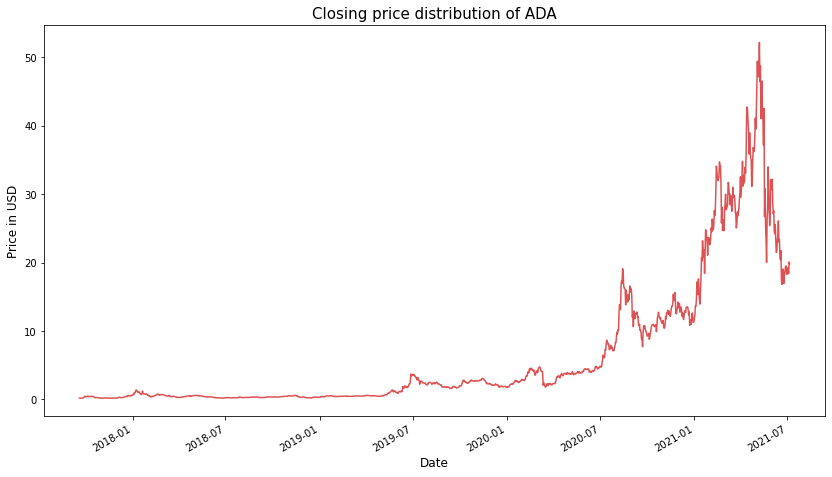

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ADA", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of ADA')

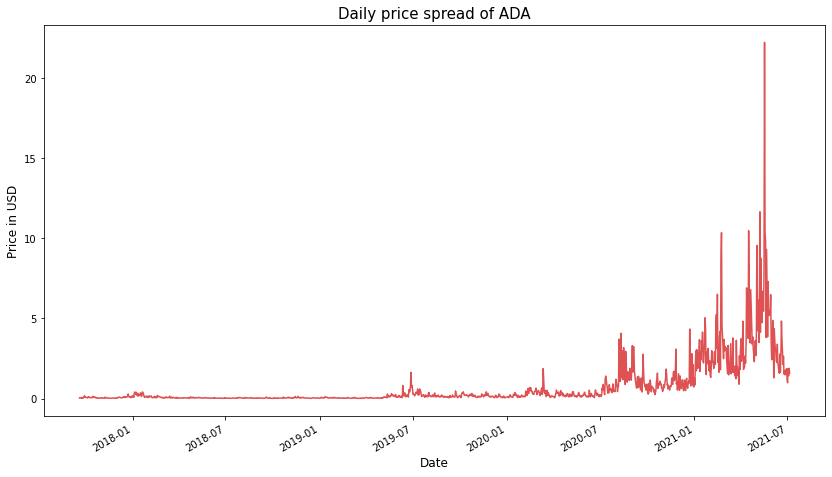

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of ADA", fontsize=15)

## Candlestick chart

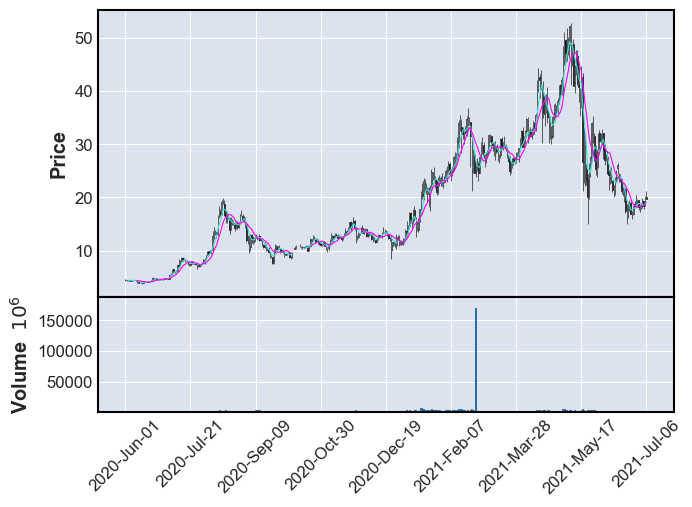

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2017-09-19,0.189165
1,2017-09-20,0.169680
2,2017-09-21,0.150503
3,2017-09-22,0.131129
4,2017-09-23,0.170278
...,...,...
1382,2021-07-02,18.538818
1383,2021-07-03,19.262838
1384,2021-07-04,18.371590
1385,2021-07-05,20.080465


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1408,2021-08-01,10.501016,7.562437,13.371349
1409,2021-08-02,10.450987,7.665244,13.619415
1410,2021-08-03,10.325427,7.555116,13.312489
1411,2021-08-04,10.268677,7.443408,13.115782
1412,2021-08-05,10.093565,7.301971,13.247303


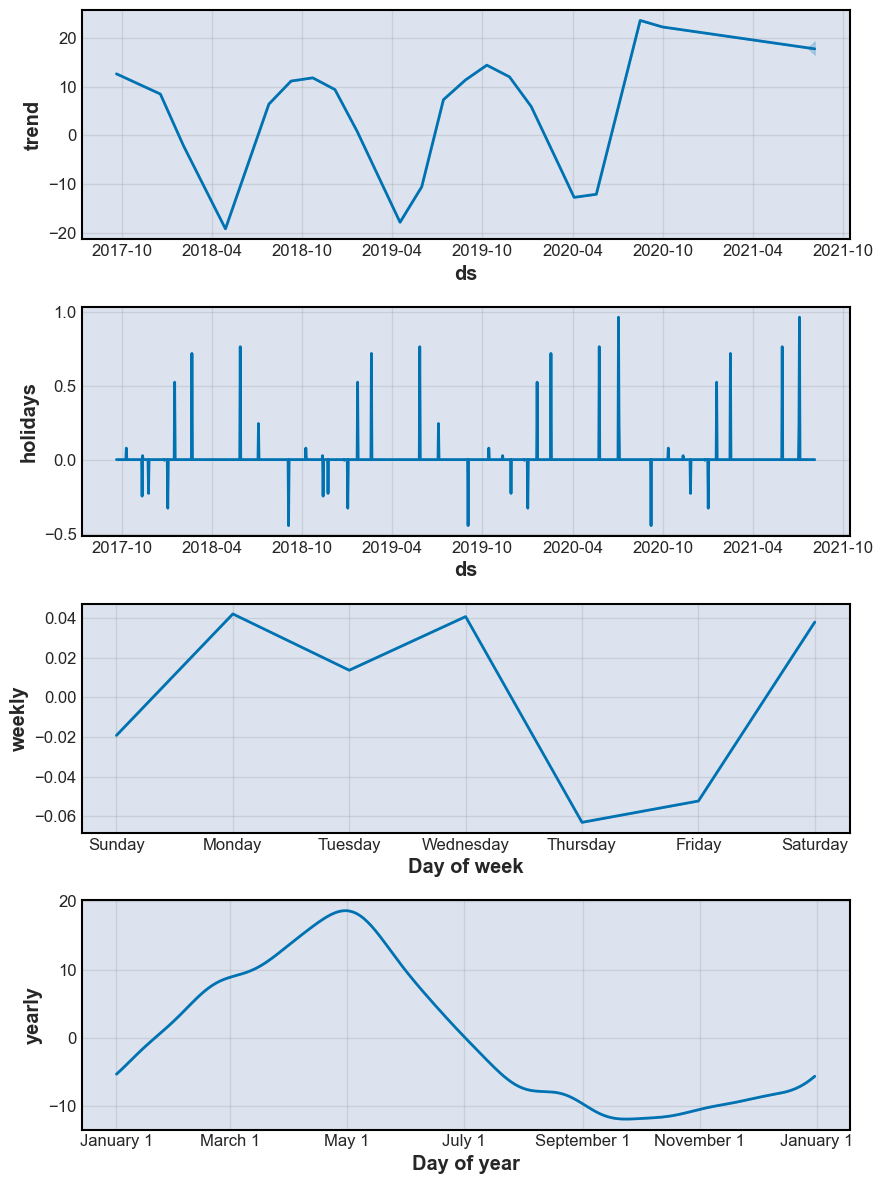

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

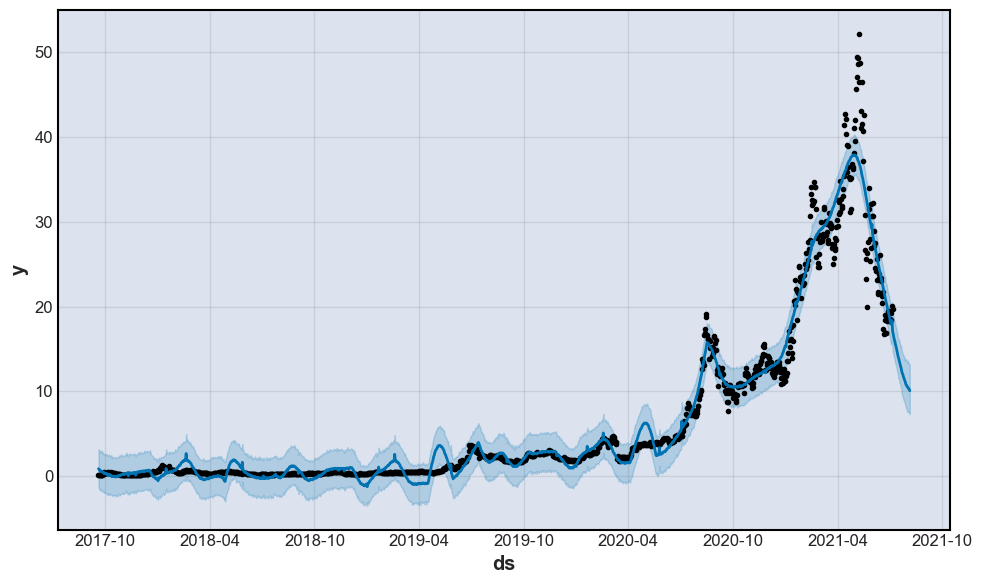

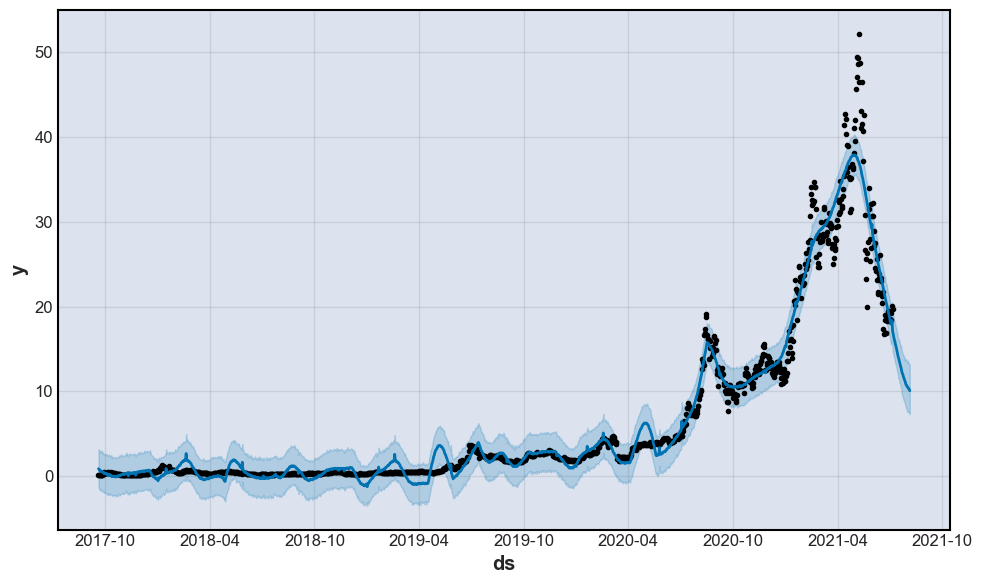

In [10]:
m.plot(forecast)